## 1. Data Loading & Preprocessing

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Deep Learning imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
TensorFlow version: 2.19.0


In [2]:
# Load MNIST dataset
print("Loading MNIST dataset...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Check data distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nClass distribution in training set:")
for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")

print(f"\nPixel value range: {X_train.min()} - {X_train.max()}")

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Class distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples

Pixel value range: 0 - 255


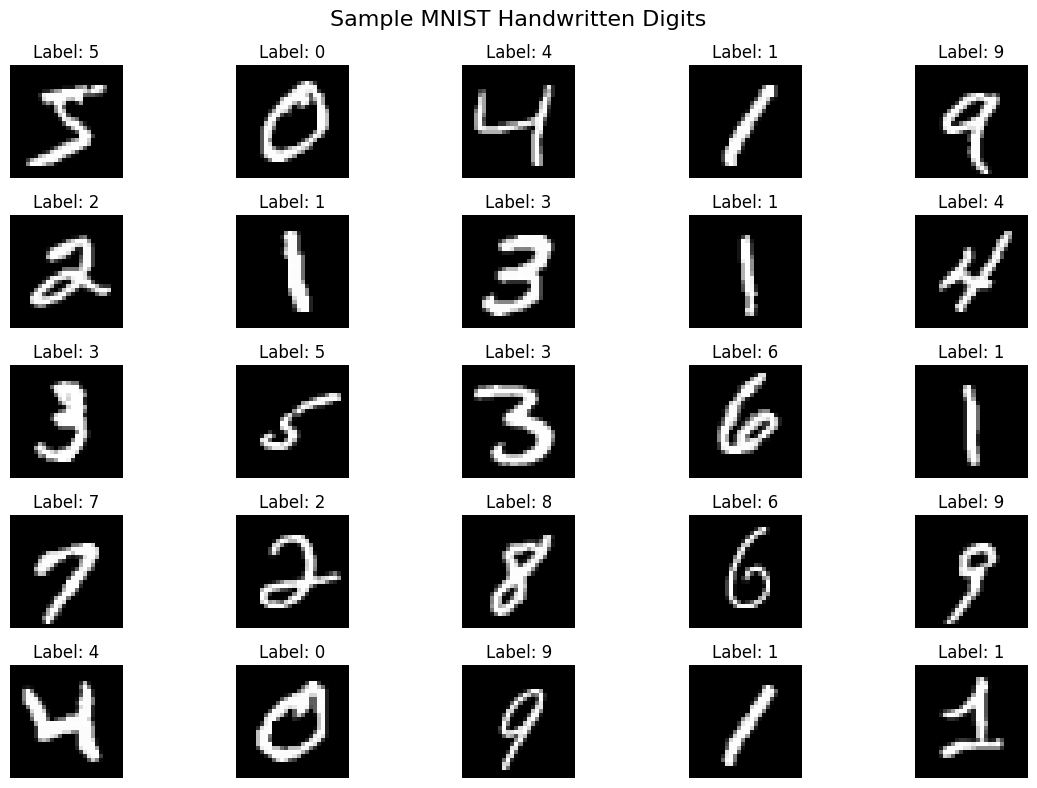

In [3]:
# Visualize sample images
plt.figure(figsize=(12, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Sample MNIST Handwritten Digits', fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# Normalize pixel values to 0-1 range
print("Normalizing pixel values...")
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"After normalization - Min: {X_train_normalized.min()}, Max: {X_train_normalized.max()}")

# Store original shapes for later use
original_shape = X_train_normalized.shape
print(f"Original image shape: {original_shape[1:]}")

print("Data preprocessing completed successfully!")

Normalizing pixel values...
After normalization - Min: 0.0, Max: 1.0
Original image shape: (28, 28)
Data preprocessing completed successfully!


## 2. Baseline Model: Logistic Regression

We'll flatten the images into vectors and train a traditional ML model as our baseline.

In [5]:
# Flatten images for traditional ML
print("Preparing data for Logistic Regression...")
X_train_flat = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flat = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

print(f"Flattened training shape: {X_train_flat.shape}")
print(f"Flattened test shape: {X_test_flat.shape}")
print(f"Each image is now a vector of {X_train_flat.shape[1]} features")

Preparing data for Logistic Regression...
Flattened training shape: (60000, 784)
Flattened test shape: (10000, 784)
Each image is now a vector of 784 features


In [6]:
# Train Logistic Regression model
print("Training Logistic Regression model...")
print("This may take a few minutes...")

# Use a subset for faster training (you can increase this for better performance)
sample_size = 10000
X_train_sample = X_train_flat[:sample_size]
y_train_sample = y_train[:sample_size]

lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model.fit(X_train_sample, y_train_sample)

print("Logistic Regression training completed!")

Training Logistic Regression model...
This may take a few minutes...
Logistic Regression training completed!


Evaluating Logistic Regression model...
Logistic Regression Accuracy: 0.9048 (90.48%)


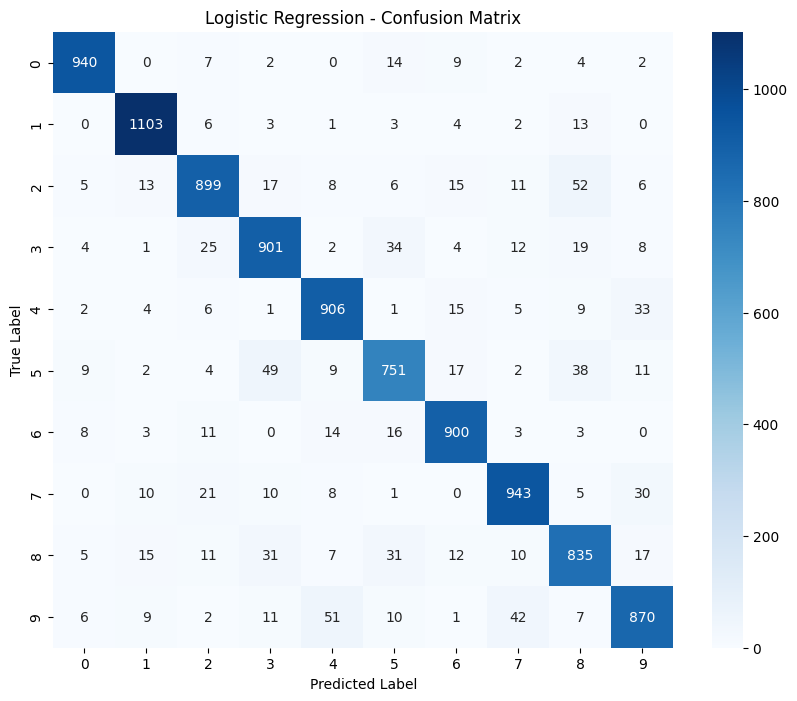


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.87      0.89      1032
           3       0.88      0.89      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.87      0.84      0.85       892
           6       0.92      0.94      0.93       958
           7       0.91      0.92      0.92      1028
           8       0.85      0.86      0.85       974
           9       0.89      0.86      0.88      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [7]:
# Evaluate Logistic Regression
print("Evaluating Logistic Regression model...")

# Predictions
y_pred_lr = lr_model.predict(X_test_flat)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

## 3. Deep Learning Model: Convolutional Neural Network (CNN)

Now we'll build a CNN to improve upon our baseline performance.

In [8]:
# Prepare data for CNN
print("Preparing data for CNN...")

# Reshape for CNN (add channel dimension)
X_train_cnn = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_normalized.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"CNN training data shape: {X_train_cnn.shape}")
print(f"CNN test data shape: {X_test_cnn.shape}")
print(f"Categorical labels shape: {y_train_cat.shape}")

Preparing data for CNN...
CNN training data shape: (60000, 28, 28, 1)
CNN test data shape: (10000, 28, 28, 1)
Categorical labels shape: (60000, 10)


In [9]:
# Build CNN architecture
def create_cnn_model():
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        # Second Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        # Third Convolutional Block
        layers.Conv2D(64, (3, 3), activation='relu'),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])

    return model

# Create and compile the model
cnn_model = create_cnn_model()

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display model architecture
print("CNN Model Architecture:")
cnn_model.summary()

CNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train CNN model
print("Training CNN model...")
print("This will take several minutes...")

# Train the model
history = cnn_model.fit(X_train_cnn, y_train_cat,
                        batch_size=128,
                        epochs=10,
                        validation_data=(X_test_cnn, y_test_cat),
                        verbose=1)

print("CNN training completed!")

Training CNN model...
This will take several minutes...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 115ms/step - accuracy: 0.7405 - loss: 0.8005 - val_accuracy: 0.9764 - val_loss: 0.0702
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.9624 - loss: 0.1309 - val_accuracy: 0.9861 - val_loss: 0.0438
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9763 - loss: 0.0827 - val_accuracy: 0.9855 - val_loss: 0.0427
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9815 - loss: 0.0675 - val_accuracy: 0.9887 - val_loss: 0.0340
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9848 - loss: 0.0525 - val_accuracy: 0.9905 - val_loss: 0.0332
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step - accuracy: 0.9863 - loss: 0.0489 - val_accuracy: 0.9918 - val_loss: 0.0294
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 114ms/step - accuracy: 0.9889 - loss: 0.0393 - val_accuracy: 0.9908 - val_loss: 0.0302
Epoch 8/10
469/469 ━━━━━━━━

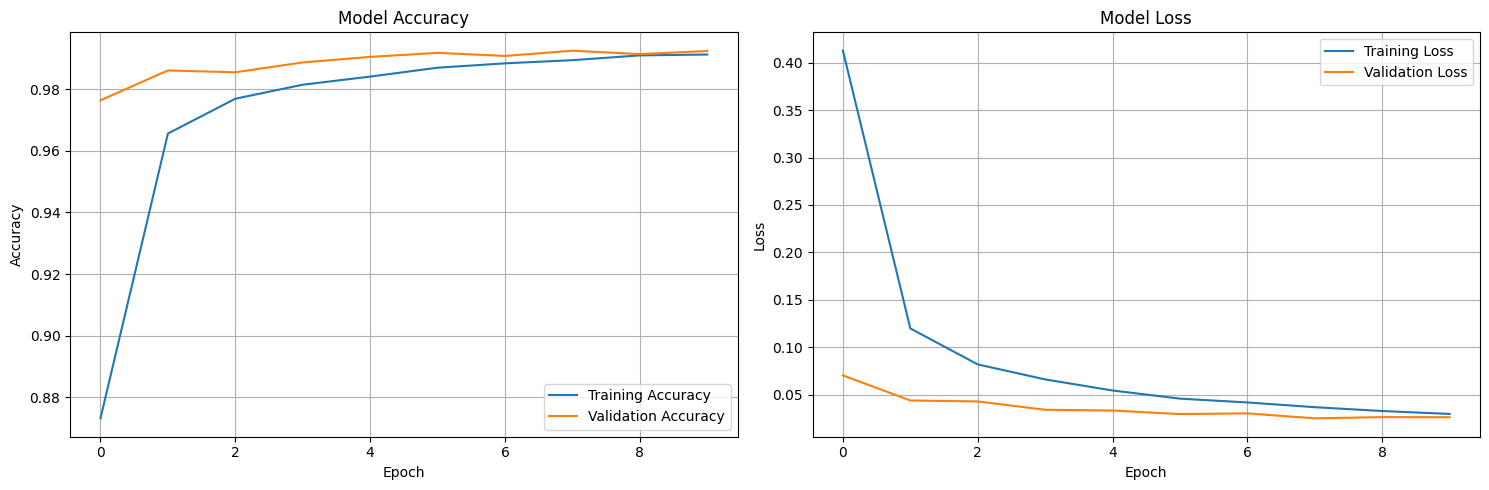

In [11]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training & validation loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Evaluating CNN model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
CNN Accuracy: 0.9924 (99.24%)


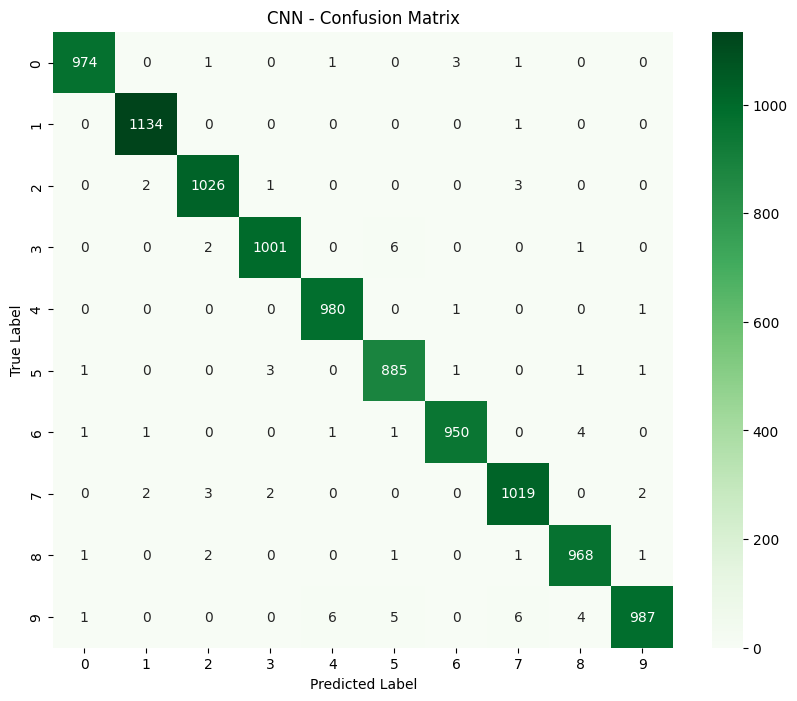


CNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
# Evaluate CNN model
print("Evaluating CNN model...")

# Get predictions
y_pred_cnn_prob = cnn_model.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn_prob, axis=1)

# Calculate accuracy
cnn_accuracy = accuracy_score(y_test, y_pred_cnn)
print(f"CNN Accuracy: {cnn_accuracy:.4f} ({cnn_accuracy*100:.2f}%)")

# Confusion Matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('CNN - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification report
print("\nCNN Classification Report:")
print(classification_report(y_test, y_pred_cnn))

## 4. Model Comparison & Results

=== MODEL COMPARISON RESULTS ===
Logistic Regression Accuracy: 0.9048 (90.48%)
CNN Accuracy: 0.9924 (99.24%)
Improvement: 8.76 percentage points


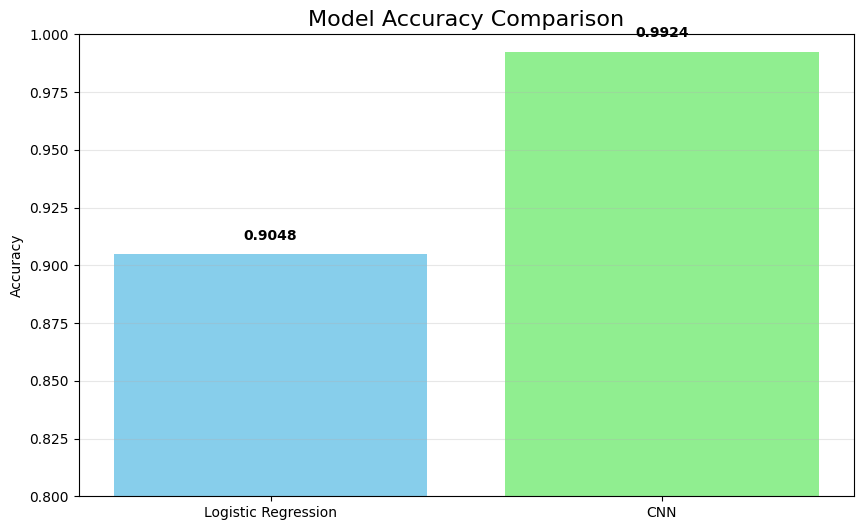

In [13]:
# Compare model performances
print("=== MODEL COMPARISON RESULTS ===")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"CNN Accuracy: {cnn_accuracy:.4f} ({cnn_accuracy*100:.2f}%)")
print(f"Improvement: {(cnn_accuracy - lr_accuracy)*100:.2f} percentage points")

# Create comparison visualization
models = ['Logistic Regression', 'CNN']
accuracies = [lr_accuracy, cnn_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

Sample Predictions Comparison:


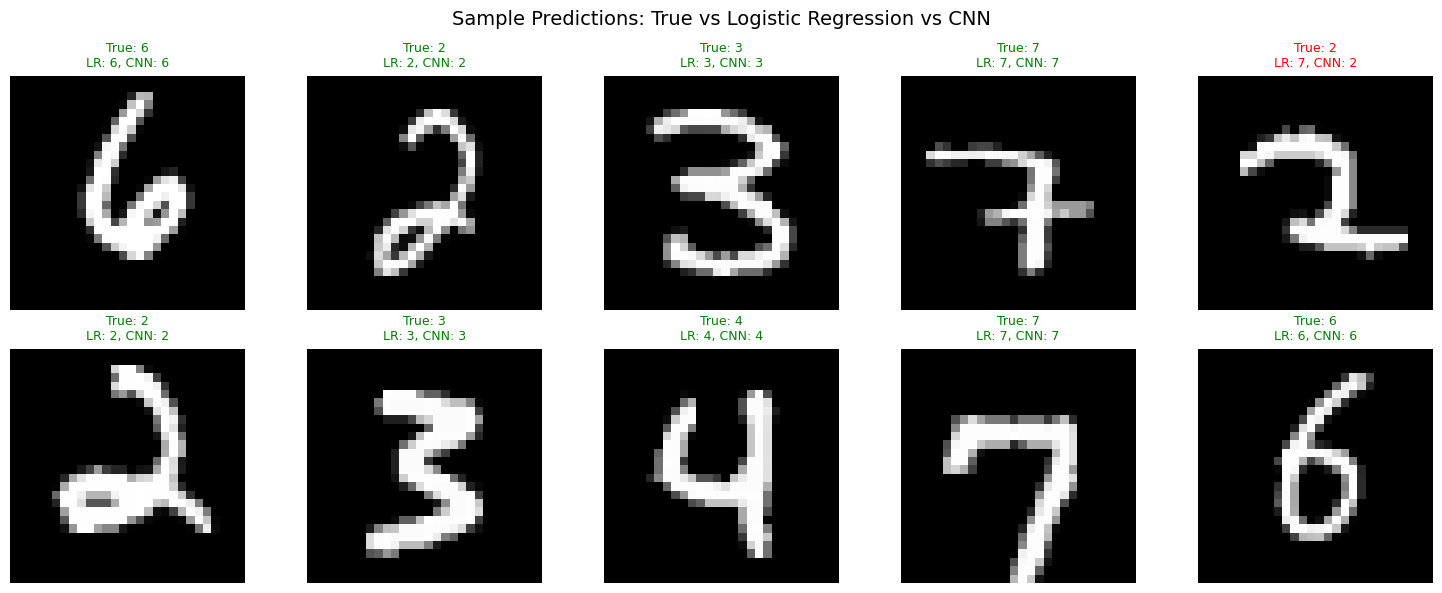

In [14]:
# Show some prediction examples
print("Sample Predictions Comparison:")

# Select some test images
sample_indices = np.random.choice(len(X_test), 10, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')

    true_label = y_test[idx]
    lr_pred = y_pred_lr[idx]
    cnn_pred = y_pred_cnn[idx]

    title = f'True: {true_label}\nLR: {lr_pred}, CNN: {cnn_pred}'
    color = 'green' if (lr_pred == true_label and cnn_pred == true_label) else 'red'
    plt.title(title, color=color, fontsize=9)
    plt.axis('off')

plt.suptitle('Sample Predictions: True vs Logistic Regression vs CNN', fontsize=14)
plt.tight_layout()
plt.show()

## 5. Ethics & Reflection

### Why AI Models Can Make Mistakes

• **Data Quality Issues**: Models learn from training data, so if the data is biased, incomplete, or contains errors, the model will inherit these problems. In our MNIST example, if certain handwriting styles were underrepresented, the model might struggle with those patterns.

• **Overfitting and Generalization**: Models might memorize training data rather than learning generalizable patterns. This causes poor performance on new, unseen data that differs from the training distribution.

• **Model Complexity vs. Interpretability Trade-off**: Complex models like CNNs can achieve high accuracy but are "black boxes" - we don't always understand why they make specific predictions, making it harder to identify and fix systematic errors.

• **Algorithmic Limitations**: Every algorithm has inherent assumptions and limitations. Simple models like logistic regression might miss complex patterns, while complex models might find spurious correlations.

### Real-World Deployment Risks

• **Postal Services Risk**: Misclassified digits could lead to mail being sent to wrong addresses, causing delivery delays, lost packages, and customer dissatisfaction. In critical situations (medical deliveries, legal documents), this could have serious consequences.

• **Banking & Financial Services Risk**: Incorrect digit recognition in check processing or account numbers could result in money being transferred to wrong accounts, fraudulent transactions going undetected, or legitimate transactions being blocked. The financial and legal implications could be severe.

• **Healthcare Applications Risk**: If used in medical record systems or prescription processing, misread digits could lead to incorrect dosages, wrong patient records, or billing errors, potentially endangering patient safety.

• **Bias and Fairness Issues**: If the training data primarily contains handwriting from certain demographics, the model might perform poorly for underrepresented groups, creating discriminatory outcomes.

### Ensuring Fairness and Reliability in Model Deployment

• **Diverse and Representative Training Data**: Ensure training datasets include handwriting samples from diverse populations, ages, educational backgrounds, and cultural contexts to minimize bias and improve generalization.

• **Robust Testing and Validation**: Implement comprehensive testing protocols including stress testing with edge cases, adversarial examples, and real-world scenarios. Use validation datasets that truly represent the deployment environment.

• **Human-in-the-Loop Systems**: Design systems where humans can review and override AI decisions, especially for high-stakes applications. Implement confidence thresholds where uncertain predictions are flagged for human review.

• **Continuous Monitoring and Improvement**: Deploy monitoring systems to track model performance in production, detect drift in data distributions, and identify when model retraining is needed. Establish feedback loops to continuously improve the system.

• **Transparency and Explainability**: Provide clear documentation about model limitations, implement explainable AI techniques where possible, and maintain transparent communication with stakeholders about system capabilities and risks.

• **Ethical Review and Governance**: Establish ethics committees to review AI deployments, create guidelines for responsible AI use, and ensure compliance with relevant regulations and industry standards.

In [15]:
# Final summary statistics
print("=== PROJECT SUMMARY ===")
print(f"Dataset: MNIST Handwritten Digits")
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")
print(f"Image dimensions: {X_train.shape[1]}x{X_train.shape[2]} pixels")
print(f"Number of classes: {len(np.unique(y_train))}")
print(f"\nBaseline Model (Logistic Regression): {lr_accuracy:.4f}")
print(f"Deep Learning Model (CNN): {cnn_accuracy:.4f}")
print(f"Performance Improvement: {((cnn_accuracy - lr_accuracy) / lr_accuracy * 100):.1f}%")
print("\nEthics considerations documented above.")
print("Project completed successfully!")

=== PROJECT SUMMARY ===
Dataset: MNIST Handwritten Digits
Training samples: 60,000
Test samples: 10,000
Image dimensions: 28x28 pixels
Number of classes: 10

Baseline Model (Logistic Regression): 0.9048
Deep Learning Model (CNN): 0.9924
Performance Improvement: 9.7%

Ethics considerations documented above.
Project completed successfully!
